<a href="https://colab.research.google.com/github/JhonnyLimachi/Sigmoidal/blob/main/58_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/eds.png" height="100px"></p>

# Aula 008: TensorFlow

***Fashion MNIST*** é um *dataset* considerado o *Hello, World!* de **Deep Learning** aplicado a problemas de **Visão Computacional**.

Contendo 60 mil imagens para treinamento e 10 mil para teste, é um *dataset* bem melhor que o antigo **MNIST** (que continha apenas digitos manuscritos).

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/fashion-mnist-sprite.png" height="400px"></p>

Ao total, as 70 mil imagens têm dimensões de 28 x 28 *pixels*, como mostra a imagem acima. Cada uma dessas imagens é classificada com um desses 10 *labels*:

<table>
  <tbody><tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody></table>

Nesta Aula 008, iremos implementar uma rede neural que usa apenas camadas Densas, seguindo o *intuition* dados nas últimas 3 aulas.

No entanto, quando se trata de imagens, normalmente iremos procurar um tipo específico de rede neural: Redes Neurais Convolucionais (*Convolutional Neural Networks*).

Por enquanto, vamos entender como resolver o *Fashion MNIST* usando o TensorFlow.

In [1]:
# importar as bibliotecas necessárias
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# carregar os dados do Fashion MNIST
(X_train_orig, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# ver dimensionalidade
print("X_train:\t", X_train_orig.shape)
print("y_train:\t", y_train.shape)
print("X_test:\t\t", X_test.shape)
print("y_test:\t\t", y_test.shape)

X_train:	 (60000, 28, 28)
y_train:	 (60000,)
X_test:		 (10000, 28, 28)
y_test:		 (10000,)


Como usaremos um algoritmo de otimização baseado em gradiente, é preciso padronizar os pixels, o que é feito diretamente ao se dividir por 255.0. Ressalta-se que tal operação já transforma os `int` em `float`.

Como o *FASHION MNIST* não possui dados de validação, irei pegar 10% dos valores com essa finalidade.

In [4]:
# padronizar o dataset de treino e criar um de validação
X_valid, X_train = X_train_orig[:6000] / 255.0, X_train_orig[6000:] / 255.0
y_valid, y_train = y_train[:6000], y_train[6000:]

In [5]:
# De acordo com a documentação, os labels são:
class_names = ['Camisetas/top', 'Calça', 'Suéter',
               'Vestidos','Casaco', 'Sandálias',
               'Camisas', 'Tênis', 'Bolsa', 'Botas']

In [6]:
# ver exemplo de uma imagem aleatória
class_names[y_train[0]]

'Bolsa'

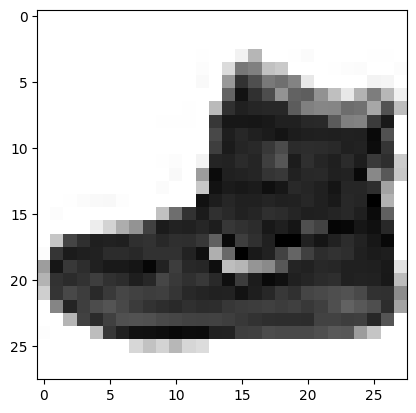

In [7]:
# plotar a imagem aleatória
plt.imshow(X_train_orig[0], cmap=plt.cm.binary);

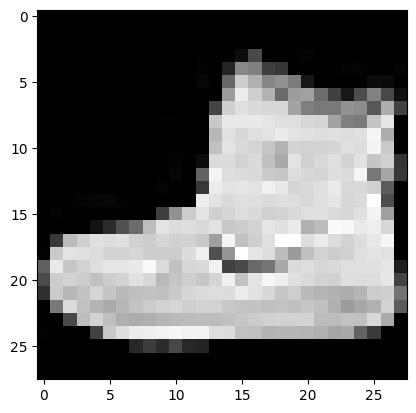

In [8]:
# plotar a imagem aleatória
plt.imshow(X_train_orig[0], cmap='gray');

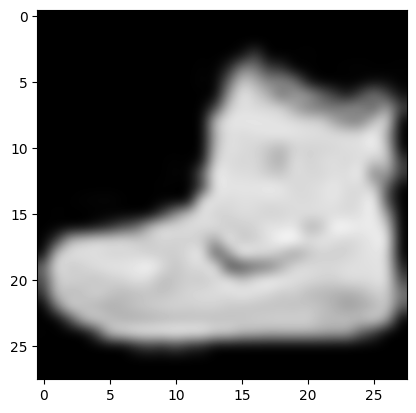

In [9]:
# plotar a imagem aleatória com interpolação diferente
plt.imshow(X_train_orig[0], cmap='gray', interpolation="bicubic");

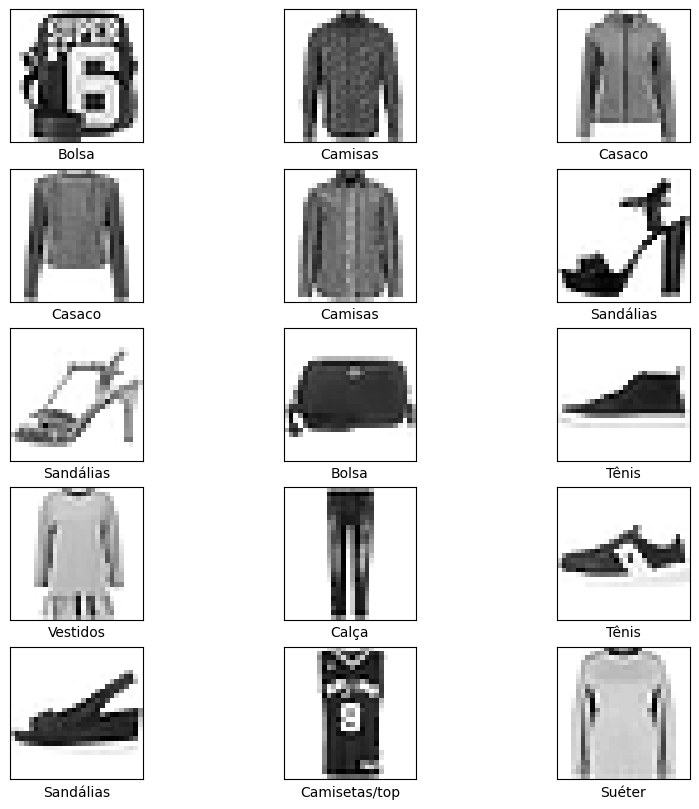

In [10]:
# ver algumas imagens de exemplo
plt.figure(figsize=(10,10))

for i in range(15):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Vamos criar um modelo bem simples de Rede Neural, usando apenas uma *hidden layer*.

In [11]:
# modelo 1
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(784, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
# ver um resumo da rede
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# atribuir uma camada a uma variável
camada1 = model.layers[1]

In [14]:
# ver o nome de uma camada
camada1.name

'dense'

In [15]:
# selecionar o layer a partir de um nome
model.get_layer(name='dense')

In [16]:
# acessando os pesos dos layers
w, b = camada1.get_weights()

print("W: \t", w.shape)
print("b: \t", b.shape)

W: 	 (784, 784)
b: 	 (784,)


In [17]:
# compilando o modelo
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [18]:
# treinando o modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1688/1688 [==============================] - 19s 11ms/step - loss: 1.1590 - accuracy: 0.6685 - val_loss: 0.7897 - val_accuracy: 0.7470
Epoch 2/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.7231 - accuracy: 0.7544 - val_loss: 0.6710 - val_accuracy: 0.7640
Epoch 3/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.6350 - accuracy: 0.7800 - val_loss: 0.6017 - val_accuracy: 0.7915
Epoch 4/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.5873 - accuracy: 0.7958 - val_loss: 0.5606 - val_accuracy: 0.8092
Epoch 5/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.5565 - accuracy: 0.8056 - val_loss: 0.5394 - val_accuracy: 0.8163
Epoch 6/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.5342 - accuracy: 0.8137 - val_loss: 0.5178 - val_accuracy: 0.8230
Epoch 7/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.5175 - accuracy: 0.8186 - val_loss: 0.5082 - val_a

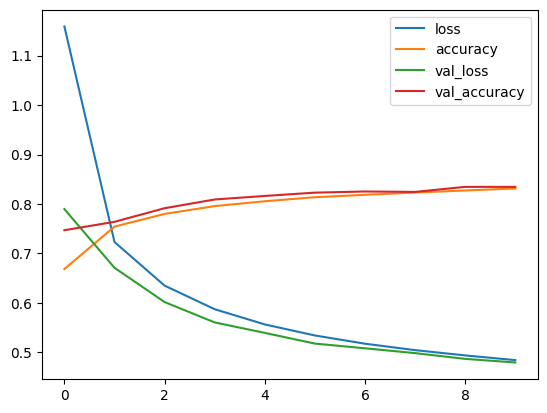

In [19]:
# plotar o histórico da otimização
pd.DataFrame(history.history).plot()
plt.show()

In [20]:
# avaliar o modelo
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.8456 - accuracy: 0.7214


[1.8456302881240845, 0.7214000225067139]

In [21]:
# modelo 2
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=(28,28)))
model2.add(keras.layers.Dense(300, activation='relu'))
model2.add(keras.layers.Dense(100, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

# compilando o modelo 2
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# treinando o modelo 2
history2 = model2.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1688/1688 [==============================] - 20s 11ms/step - loss: 0.4870 - accuracy: 0.8251 - val_loss: 0.4013 - val_accuracy: 0.8512
Epoch 2/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3687 - accuracy: 0.8633 - val_loss: 0.3557 - val_accuracy: 0.8727
Epoch 3/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3288 - accuracy: 0.8772 - val_loss: 0.3355 - val_accuracy: 0.8765
Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3053 - accuracy: 0.8866 - val_loss: 0.3385 - val_accuracy: 0.8715
Epoch 5/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2876 - accuracy: 0.8933 - val_loss: 0.3237 - val_accuracy: 0.8813
Epoch 6/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.2699 - accuracy: 0.8974 - val_loss: 0.3420 - val_accuracy: 0.8718
Epoch 7/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.2588 - accuracy: 0.9024 - val_loss: 0.3181 - val_a

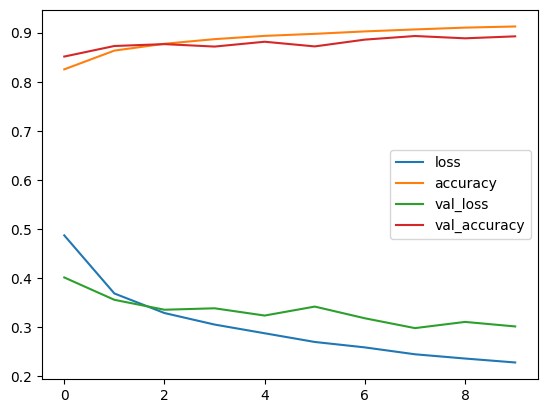

In [22]:
pd.DataFrame(history2.history).plot()
plt.show()

In [23]:
# avaliar o modelo 2
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 50.5143 - accuracy: 0.8733


[50.51426315307617, 0.8733000159263611]

#### Redes Neurais Convolucionais

In [24]:
# modelo 3
model3 = keras.Sequential()

# definir a arquitetura da rede neural
model3.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model3.add(keras.layers.MaxPooling2D(pool_size=2))
model3.add(keras.layers.Dropout(0.3))
model3.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model3.add(keras.layers.MaxPooling2D(pool_size=2))
model3.add(keras.layers.Dropout(0.3))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(256, activation='relu'))
model3.add(keras.layers.Dropout(0.5))
model3.add(keras.layers.Dense(10, activation='softmax'))

# Ver a aarquitetura do modelo 3
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)         

In [25]:
model3.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics='accuracy')

In [26]:
model.fit(X_train, y_train, batch_size=64,
         epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
844/844 [==============================] - 7s 8ms/step - loss: 0.4759 - accuracy: 0.8343 - val_loss: 0.4714 - val_accuracy: 0.8365
Epoch 2/10
844/844 [==============================] - 7s 9ms/step - loss: 0.4723 - accuracy: 0.8353 - val_loss: 0.4678 - val_accuracy: 0.8387
Epoch 3/10
844/844 [==============================] - 7s 9ms/step - loss: 0.4690 - accuracy: 0.8366 - val_loss: 0.4664 - val_accuracy: 0.8425
Epoch 4/10
844/844 [==============================] - 7s 8ms/step - loss: 0.4660 - accuracy: 0.8378 - val_loss: 0.4636 - val_accuracy: 0.8373
Epoch 5/10
844/844 [==============================] - 8s 9ms/step - loss: 0.4630 - accuracy: 0.8385 - val_loss: 0.4599 - val_accuracy: 0.8420
Epoch 6/10
844/844 [==============================] - 6s 7ms/step - loss: 0.4604 - accuracy: 0.8393 - val_loss: 0.4579 - val_accuracy: 0.8422
Epoch 7/10
844/844 [==============================] - 7s 9ms/step - loss: 0.4578 - accuracy: 0.8398 - val_loss: 0.4551 - val_accuracy: 0.8425
Epoch 

## **Extra: MIT 6.S191 Parte 09**

Chat da aula:

00:26:48	Carlos Melo:	https://colab.research.google.com/drive/1UFfZgDxnQD7rqhgj_2sS8mcDAhStd6JD?usp=sharing

00:37:51	Henry Moreira:	sobrou, mas estou duas aulas para trás...mas alcanço.

00:38:00	Henry Moreira:	lega, vai ter de rock tambem

00:41:50	Henry Moreira:	boa noite, melhoras para você, que de tudo certo, que suma as pedras..

00:43:29	Mortaza:	Boa noite